# MTH5001: Introduction to Computer Programming 2018/19

## Final Report Project: "Networks"

### Instructions:

First, please type your name and student number into the Markdown cell below:

**Name:** Joseph Meyrick

**Student number:** 170323354

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. (You should create new code and/or Markdown cells in the appropriate places, so that your answers are clearly visible.)

Your code must be well documented. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation). You should also use sensible variable names, so that your code is as clear as possible. If your code works but is unduly difficult to read, then you may lose marks.

For this project, you will need to use the Python package [NetworkX](https://networkx.github.io/) extensively. However, to test your coding skills, in certain questions you will be restricted to using only specific functions. 
These restrictions are made clear below (see questions 4 and 8).

### Submission deadline:

You must submit your work via QMPlus (to the "Final Report Project" assignment in the "Final Report Project" section).

The submission deadline is **11:55pm on Monday 29 April, 2019**. Late submissions will be penalised according to the School's [guidelines](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=89105).

Your lecturers will respond to project-related emails until 5:00pm on Friday 26 April, 2019, only. You should aim to have your project finished by this time.

### Marking:

The project is worth 70% of your final mark for this module.

The total number of marks available for the project is 100. 

Attempt all parts of all questions.

When writing up your project, good writing style is even more important than in written exams. 
According to the [advice in the student handbook](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87786),

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87787). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work accordingly before finalising your submission.

You may summarise relevant parts of books, online notes, or other resources, as you see fit.
However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87793) any sources that you use. Similarly, if you decide to work with other students on parts of the project, then you **must** write up your work individually. You should also note that most of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).

## Background information

In this project you will learn about a field of mathematics called [graph theory](https://en.wikipedia.org/wiki/Graph_theory). 
A **graph** (or **network**) is simply a a collection of **nodes** (or **vertices**), which may or may not be joined by **edges**. 
(Note that this is not the same as the 'graph' of a function.)

Graphs can represent all sorts of real-world (and, indeed, mathematical) objects, e.g. 

* social networks (nodes represent people, edges represent 'friendship'),
* molecules in chemistry/physics (nodes represent atoms, edges represent bonds),
* communications networks, e.g. the internet (nodes represent computers/devices, edges represent connections).

In this project we will only consider **undirected** graphs (see the above Wikipedia link for a definition).

Conventiently, Python has a package, called [NetworkX](https://networkx.github.io/), for constructing and analysing graphs. 
Let's look at an example. 
Below we create the famous [Petersen graph](https://en.wikipedia.org/wiki/Petersen_graph) and use some basic NetworkX functions to learn a bit about it.

In [2]:
# import NetworkX and other useful packages
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx

# create the Petersen graph, storing it in a variable called "PG"
PG = nx.petersen_graph()

Before we doing anything else, it would make sense to draw the graph, to get an idea of what it looks like. 
We can do this using the NetworkX function `draw_networkx` (together with our old favourtie, matplotlib).

C:\Users\valom\sds\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


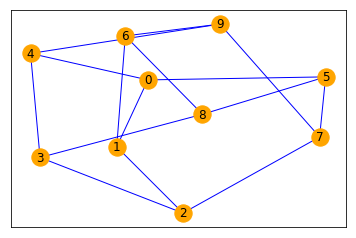

In [3]:
nx.draw_networkx(PG, node_color = 'orange', edge_color = 'blue', with_labels=True)
plt.xticks([])
plt.yticks([])
plt.show()

We can see that the graph has 10 nodes, labelled by the integers $0,1,\ldots,9$. 
It is also possible to label nodes with other data types, most commonly strings, but we won't do that in this project. 
The nodes of a graph can be accessed via the method `nodes()`:

In [4]:
PG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

You can convert this to a Python list if you need to:

In [5]:
list(PG.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

This (hopefully) makes it clear that the node labels do in fact have type `int`, at least in our example.
You can also see from the picture that the graph has 15 edges. 
These can be accessed using the method `edges()`:

In [6]:
print([x for x in PG.edges()])

[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


Again, you can convert this to a list if you need to (try it), and you will see that the elements of the list are tuples. In either case, if you compare the output with the picture, it should become clear what it means, i.e. two nodes labelled $i$ and $j$ are joined by an edge if and only if the pair $(i, j)$ appears in `PG.edges()`. 

So far we haven't said much about how graphs are related to **mathematics**. It turns out that a graph can be completely defined by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). This is simply a matrix $A$ defined as follows: 

* $A$ has size $n \times n$, where $n$ is the number of nodes in the graph;
* if the nodes labelled $i$ and $j$ form an edge, then the $(i,j)$-entry of $A$ is $1$; if they don't form an edge, the $(i,j)$-entry of $A$ is $0$.

This idea is the foundation of [algebraic graph theory](https://en.wikipedia.org/wiki/Algebraic_graph_theory), a field of mathematics used to study graphs by analysing certain matrices.

Not surprisingly, you can compute the adjacency matrix of a graph using an appropriate NetworkX function. Let's do this for the Petersen graph:

In [7]:
A = nx.adjacency_matrix(PG)
print(A)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 1)	1
  (2, 3)	1
  (2, 7)	1
  (3, 2)	1
  (3, 4)	1
  (3, 8)	1
  (4, 0)	1
  (4, 3)	1
  (4, 9)	1
  (5, 0)	1
  (5, 7)	1
  (5, 8)	1
  (6, 1)	1
  (6, 8)	1
  (6, 9)	1
  (7, 2)	1
  (7, 5)	1
  (7, 9)	1
  (8, 3)	1
  (8, 5)	1
  (8, 6)	1
  (9, 4)	1
  (9, 6)	1
  (9, 7)	1


Note that if you print this 'adjacency matrix' (try it), it doesn't actually look much like a matrix. This is because it doesn't have type `numpy.ndarray` like the matrices/arrays we've worked with in class:

In [8]:
type(nx.adjacency_matrix(PG))

scipy.sparse.csr.csr_matrix

However, you can convert it to a `numpy.ndarray` by calling the method `toarray()`:

In [9]:
A = A.toarray()

In [10]:
type(A)

numpy.ndarray

After doing this, the adjacency matrix looks like you would expect, so you can use all the usual `numpy.linalg` functions on it:

In [11]:
print(A)

[[0 1 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


Make sure that you understand what all these $0$'s and $1$'s mean: the $(i,j)$-entry of the adjacency matrix is $1$ if and only if the edges labelled $i$ and $j$ form an edge in the graph; otherwise, it is $0$. For example (remembering that Python starts counting from $0$, not from $1$): the $(0,4)$ entry is $1$, and in the picture above we see that nodes $0$ and $4$ form an edge; on the other hand, the $(1,7)$ entry is $0$, and accordingly nodes $1$ and $7$ don't form an edge.

You will be working with matrices related to graphs quite a lot in this project, so before you begin you should make sure that you understand what the code we've given you above is doing. 
You may also like to work through the official [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html) before attempting the project, bearing in mind that not everything in the tutorial is relevant to the project. 
(Alternatively, Google for another tutorial if you don't like that one.)

**A final remark before we get to the project itself:**

You can rest assured that the graphs we consider this project all have the following nice properties:

* They are **connected**. This means that for every pair of nodes $i$ and $j$, there is a 'path' of edges joining $i$ to $j$. For example, the Petersen graph is connected, e.g. the nodes labelled $6$ and $7$ do not form an edge, but we can still reach node $7$ from node $6$ via the edges $(6,9)$ and $(9,7)$.
* They are **simple**. This means that there is never an edge from a node to itself.

You may come across these terms when you are researching the relevant mathematics for various parts of the project, so you should know what they mean.

## The project

As we have already mentioned, in this project you will make extensive use of the Python package [NetworkX](https://networkx.github.io/), which allows you to create and analyse graphs. 
You are expected to read the relevant parts of the NetworkX documentation, or otherwise learn how to use whatever Python functions you need to complete the project. 
However, the mini-tutorial which we have provided above should be enough to get you started.

You will also need to research and summarise some mathematics related to graphs, and to use your findings to write certain pieces of code 'from scratch', instead of of using NetworkX functions. 
In these cases (questions 4 and 8), it is **strongly recommended** that you use NetworkX to check your answers.

You should structure your report as follows:

### Part I: Data import and preliminary investigation [10 marks] FINISHED

You have been provided with a Python file called **"data.py"** on QMPlus, which you should save in the same directory as this Jupyter notebook.
This file contains a function `create_graph` which constructs a random graph that you will be analysing throughout the project. 
By following the instructions in question 1 (below), you will create a graph that is unique to you, i.e. no two students will have the same graph.

**1. [5 marks]** Execute the following code cell to create your graph, storing it in a variable called `G` (you can change the variable name if you like, but we recommend leaving it as it is). You **must** replace the number "123456789" with your 9-digit student number. 

*Important note: If you do not do this correctly, you will score 0 for this question, and if you are found to have used the same input as another student (rather than your individual student number), then your submission will be reviewed for plagiarism.*

In [12]:
from data import create_graph

G = create_graph(170323354)


**2. [5 marks]** Draw your graph, and calculate how many nodes and edges it has. 

Nodes: 59
Edges: 108


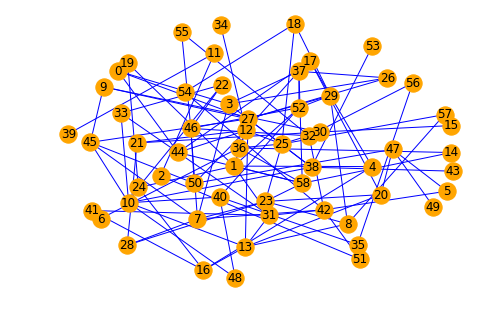

In [13]:
## Display amount of nodes and edges to the display
print("Nodes: {0}\nEdges: {1}".format(len(G.nodes()),len(G.edges)))

## Draw the graph
Spacings = nx.spring_layout(G,k = 7,iterations = 400)
nx.draw(G,Spacings, node_color = 'orange', edge_color = 'blue',with_labels=True)

### Part II: Distance matrices and shortest paths [30 marks]

Many properties of graphs can be analysed by using matrices/linear algebra. 
The rest of your report will involve researching/summarising some of the relevant mathematics, and writing/using Python code to analyse certain properties of your graph from Part I. 
As explained above, you are allowed to summarise information from books and/or web pages, but you must use your own words and clearly reference any sources you use.

**3. [10 marks]** Explain what a "path" between two nodes in a graph is, and what the "distance" between two nodes is. Explain also what the "distance matrix" of a graph is, and how it can be computed using the adjacency matrix. 
Here you should discuss arbitrary (undirected, simple, connected) graphs, not your specific graph from Part I.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

In [14]:
'''
A path is an edge which connects two nodes together in some graph 'G'. An undirected graph means that you can traverse that 
edge in both directions whereas a directed graph means that's there is only one way of travel indicated by an arrow in the 
direction to a connected neighbour node. A simple graph means that there are no vertices which has an edge to itself i.e. there 
isnt a loop inside the graph creating a path from a vertex to itself.

The distance between two nodes A and B is defined the number of vertices in the shortest path connecting them.

Every edge can written in the form (i,j) where i and j are the two nodes which that edge connects. The distance matrix 
is an n*n square matrix where n is the number of nodes and every (i,j) element is filled with the distance from i --> j. We can
use the adjacency matrix to calculate the distance as it shows us which nodes are connected to each other.
'''
## references 
##https://en.wikipedia.org/wiki/Distance_(graph_theory)

"\nA path is an edge which connects two nodes together in some graph 'G'. An undirected graph means that you can traverse that \nedge in both directions whereas a directed graph means that's there is only one way of travel indicated by an arrow in the \ndirection to a connected neighbour node. A simple graph means that there are no vertices which has an edge to itself i.e. there \nisnt a loop inside the graph creating a path from a vertex to itself.\n\nThe distance between two nodes A and B is defined the number of vertices in the shortest path connecting them.\n\nEvery edge can written in the form (i,j) where i and j are the two nodes which that edge connects. The distance matrix \nis an n*n square matrix where n is the number of nodes and every (i,j) element is filled with the distance from i --> j. We can\nuse the adjacency matrix to calculate the distance as it shows us which nodes are connected to each other.\n"

**4. [10 marks]** Write a function `distance_matrix` which computes the distance matrix of a graph. 
Your function should return a matrix, represented as an array of type `numpy.ndarray`, of the same shape as the adjacency matrix of the graph. 
You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **must not use any other NetworkX functions**.

In [ ]:
def distance_matrix(Matrix):
    
    def GetNeighbourList(List):
        for x in range(len(Matrix)):
            if List[x][1] == []:
                List[x][1]=list(G.neighbors(x))
            else:
                Substitute = []
                for EachNumber in List[x][1]:
                    Substitute += list(G.neighbors(EachNumber))
                List[x][1] = Substitute  
        return List

    def UpdateMatrix(List,n):
        for x in range(len(Matrix)):
            for y in list(G.neighbors(x)):
                for z in List[y][1]:
                    if Matrix[x,z] == 0:
                        Matrix[x,z] = n
                
    List = [[n,[]] for n in range(len(Matrix))]
    for x in range(2,4):
        List = GetNeighbourList(List)
        UpdateMatrix(List,x)
    
    return Matrix

## Computes the distance matrix for any given adjacency matrix
distance_matrix(nx.adjacency_matrix(G).toarray())

##References
##https://stackoverflow.com/questions/1987694/how-to-print-the-full-numpy-array-without-truncation

**5. [5 marks]** Using your function from Question 4, find a pair of nodes $(i,j)$ in your graph from Part I with the property that the distance from $i$ to $j$ is maximal amongst all pairs of nodes in the graph. 

Note: This means that for every *other* pair of nodes $(i',j')$, the distance from $i'$ to $j'$ is less than or equal to the distance from $i$ to $j$.

In [630]:
DistanceMatrix = distance_matrix()

#Define the check that we will compare the length of each path to.
LongestTravel = 0

# This finds the longest route from the distance Matrix
for x in G.nodes():
    for y in G.nodes():
        if DistanceMatrix[x,y] >= LongestTravel:
            LongestTravel = DistanceMatrix[x,y]
            
## Now go back through the Distance Matrix and pick out any node pairs which are this longest distance apart.
## Question specifies we only need one pair so break after one iteration
print("Highest Distance: {0}".format(LongestTravel))            
for x in G.nodes():
    for y in G.nodes():
        if DistanceMatrix[x,y] == LongestTravel:
            print("({0},{1})".format(x,y)) 

Highest Distance: 9


**6. [5 marks]** Find a shortest path between your nodes from Question 5, i.e. one with the shortest possible length, and re-draw your graph so that this path is clearly visible. 
You should use one colour for the nodes and edges in the path, and a different colour for all other nodes and edges. 

Hint: You should be able to find a NetworkX function that computes a shortest path.

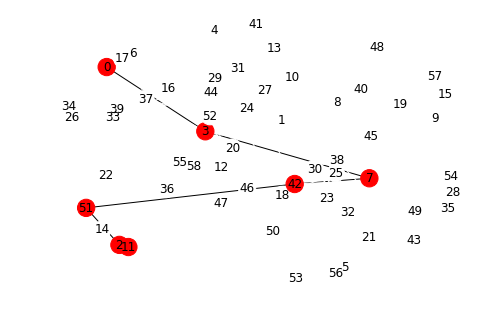

In [348]:
## Define the Shortest Path between two nodes 0 and 11
ShortestPath = nx.shortest_path(G,0,11)

## Allocate a different colour to all the nodes which are inside the shortest path
NodeColours = []
for x in G.nodes():
    if x in ShortestPath:
        NodeColours.append("Red")
    else:
        NodeColours.append("White")
        
## Allocate a different colour to all the edges which are inside the shortest path
EdgeColours = []
for x in G.edges():
    if x[0] in ShortestPath and x[1] in ShortestPath:
        EdgeColours.append("Black")
    else:
        EdgeColours.append("White")
        
## Draw graph spread out with path clearly visible
Spacings = nx.spring_layout(G,k=6,iterations = 400)
nx.draw(G,Spacings,node_color = NodeColours, edge_color=EdgeColours,with_labels=True)

### Part III: Laplacian matrices and spanning trees [30 marks] FINISHED

So far you have learned about two matrices associated with a graph: the adjacency matrix, and the distance matrix. Now you will study a third matrix: the Laplacian.

**7. [10 marks]** Explain what the "degree" of a node in a graph is, what the "Laplacian matrix" of a graph is, what a "spanning tree" of a graph is, and how the Laplacian matrix can be used to calculate the number of spanning trees in a graph. 
Here, again, you should discuss arbitrary (undirected, simple, connected) graphs, not your specific graph from Part I.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

In [343]:
'''
Let G be a graph. The 'Degree' of a node is the integer number of nodes which are connected to it i.e. two nodes in G that share 
an edge are said to be connected. To calculate the degree would be easy on a simple and undirected graph because you can 
just count the number of edges from any given node. The degree of a directed graph is the number of edges which point towards 
a connected node so a directed graph will therefore have a lower degree than an undirected graph. 

The Laplacian Matrix 'L' is defined as the Degree Matrix 'M' of graph G minus the Adjacency Matrix 'A' of the same graph. The 
Degree matrix is an nxn matrix where each diagonal element is the degree for that node. L is then defined at 'L=M-G'.

Let T be some spanning tree in graph G. A 'spanning tree' T is a subtree that starts at any vertex in G and can reach all of the 
vertices in G in the shortest distance. Graphs can have multiple trees but only connected Graphs can have a spanning tree which
visits all of the vertices in G, this is called a subgraph. Loops in Graphs are ignored and removed when creating a spanning 
tree i.e. looped graphs produce the same spanning tree as a simple graph. All undirected connected graphs can produce 
spanning trees which contains all vertices in G and only some directed graphs have this ability. Take a square graph of 4 nodes
, if you connect 3 nodes to the same 4th node with a directed edge, a spanning tree with all vertices of G cannot be produced.

We can use the Laplacian Matrix to calculate the number of spanning trees in a graph by calculating the determinant of that
Laplacian Matrix.

'''
##References
##https://en.wikipedia.org/wiki/Kirchhoff%27s_theorem
##https://en.wikipedia.org/wiki/Spanning_tree
##https://en.wikipedia.org/wiki/Degree_matrix

"\nLet G be a graph. The 'Degree' of a node is the integer number of nodes which are connected to it i.e. two nodes in G that share \nan edge are said to be connected. To calculate the degree would be easy on a simple and undirected graph because you can \njust count the number of edges from any given node. The degree of a directed graph is the number of edges which point towards \na connected node so a directed graph will therefore have a lower degree than an undirected graph. \n\nThe Laplacian Matrix 'L' is defined as the Degree Matrix 'M' of graph G minus the Adjacency Matrix 'A' of the same graph. The \nDegree matrix is an nxn matrix where each diagonal element is the degree for that node. L is then defined at 'L=M-G'.\n\nLet T be some spanning tree in graph G. A 'spanning tree' T is a subtree that starts at any vertex in G and can reach all of the \nvertices in G in the shortest distance. Graphs can have multiple trees but only connected Graphs can have a spanning tree which\nvisi

**8. [10 marks]** Write a function `number_of_spanning_trees` which takes as input a graph $G$ and returns the number of spanning trees in $G$. You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **may not use any other NetworkX functions**.

Note: You will probably need to compute the determinant of a certain matrix somewhere in your code. If you use the function `numpy.linalg.det` then your determinant will only be computed approximately, i.e. to a certain numerical precision. This is fine; you will not lose any marks if your code is otherwise correct.

In [283]:
def number_of_spanning_trees(G):
    ## Produces Adjacency Matrix
    AdjacencyMatrix = nx.adjacency_matrix(G).toarray()
    ## Produces Degree Matrix
    DegreeMatrix = np.zeros((len(G.nodes),len(G.nodes)))
    Count = 0
    for x in G.nodes():
        for y in G.nodes():
            if AdjacencyMatrix[x,y]==1:
                Count +=1
        DegreeMatrix[x,x]=Count
        Count=0
    ## Produces Laplacian Matrix
    LaplacianMatrix = DegreeMatrix - AdjacencyMatrix
    ## Returns Determinant of Laplacian Matrix
    return int(la.det(LaplacianMatrix))

**9 [5 marks]** Use your function from Question 8 to calculate the number of spanning trees in your graph from Part I.

In [284]:
number_of_spanning_trees(G)

131253007

**10 [5 marks]** Find a minimal spanning tree of your graph from Part I, i.e. one with the smallest possible number of edges. Re-draw your graph in such a way that this spanning tree is clearly visible. You should use one colour for the edges in the spanning tree, and a different colour for all other edges. 

Hint: You should be able to find a NetworkX function that computes a minimal spanning tree.

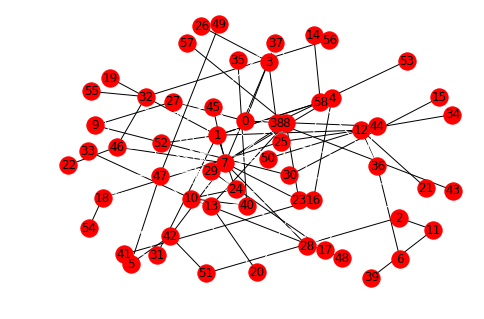

In [349]:
## Produces the minimal spanning tree from my graph of G
SpanTree = nx.minimum_spanning_tree(G)
## We need to create to set of colours which each edge shall take
## Black lines represent a spanning tree edge and White represents all other edges
TreeEdgeColours = []
##Take the whole set of edges
for x in G.edges():
    ## if it is an edge in the spanning tree
    if x in SpanTree.edges():
        ##Label edge Black
        TreeEdgeColours.append("Black")
    else:
        ##Label edge White
        TreeEdgeColours.append("White")
        
## Draw the graph spread out with coloured edges
Spacings = nx.spring_layout(G,k=6,iterations = 400)
nx.draw(G,Spacings,node_color = "Red", edge_color=TreeEdgeColours,with_labels=True)

### Part IV: Eigenvalues and triangles [30 marks]

By now you have seen that certain matrices associated with a graph can tell us a lot about the structure of the graph. 
In this final part of the project, you will investigate this further, by learning how eigenvalues can be used to reveal even more information about graphs.

**11. [5 marks]** Explain what a "triangle" in a graph is, and quote a formula for calculating the number of triangles in a graph from the eigenvalues of the adjacency matrix.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

In [ ]:
'''
A triangle is a series of 4 connected vertices where the first and the last vertex are the same vertex 
i.e. A --> B --> C --> A. There can be other edges attached to each vertex A,B,C but that path must exist for a 
triangle to exist.

you need to take all of the eigenvalues for some adjacency matrix A, cube each of them individually then sum them all
together and then divide that answer by 6 to then get all of the discrete triangles inside that graph.
'''
##reference
##http://www2.math.ou.edu/~kmartin/graphs/chap3.pdf (page 111)

**12. [5 marks]** Calculate the number of triangles in your graph from Part I, using the formula discussed in question 11. Your answer **must** be an integer.

Hint: What is the "trace" of a matrix and how is it related to the eigenvalues?

In [396]:
## Produces Adjacency Matrix
AdjacencyMatrix = nx.adjacency_matrix(G).toarray()

## Produces Spectrum of Eigenvalues
Spectrum = la.eigvals(AdjacencyMatrix)

## Produces a list where each individual eigenvalue has been cubed
Spectrum_Cubed = [x**3 for x in Spectrum]

## Find number of triangles whilst taking care of floating point errors made by the sofware
NumberOfTriangles = int(round(sum(Spectrum_Cubed)))/6

print(NumberOfTriangles)

8.0


**13. [10 marks]** Write a function `all_triangles` which finds all of the triangles in a graph. Use your function to count the number of triangles in your graph, and compare with your answer to question 12. (The two answers should, of course, be the same.)

Note: You will need to use your function in the next question, so you should think carefully about what kind of data structure you want it to output.

In [647]:
def findPaths2(G,u,n,excludeSet = None):
    if excludeSet == None:
        excludeSet = set([u])
    else:
        excludeSet.add(u)
    if n==0:
        return [[u]]
    paths = [[u]+path for neighbor in G.neighbors(u) if neighbor not in excludeSet for path in findPaths2(G,neighbor,n-1,excludeSet)]
    excludeSet.remove(u)
    return paths
allpaths = []
for node in G:
    allpaths.extend(findPaths(G,node,3))
    
for x in allpaths:
    if x[0] == x[3]:
        print("Here")

#https://stackoverflow.com/questions/28095646/finding-all-paths-walks-of-given-length-in-a-networkx-graph

**14. [10 marks]** Re-draw your graph from Part I once more, so that all of its triangles are clearly visible. 
You should use one colour for the edges that appear in at least one triangle, and a different colour for all other edges.

In [ ]:
TriEdgesColour,TriNodesColour = all_triangles()

nx